# Taller 3
1. [Función  que dada una ruta de archivo de VBox lea los datos y trabaje que con ellos.](#primero) **La función debe servir para los dos tipos de archivos VBox**.

1. [Comparar el rendimiento de combustión interna con el kart eléctrico en términos de tiempo de vuelta, velocidades instantáneas y aceleraciones, comparación y discusión.](#segundo)

1. [A partir de los modelos del taller anterior, analizar el desempeño de los motores de combustión interna y eléctrico y comparar el momento par, la potencia y la velocidad de giro.](#tercero)

1. [Sugerir posibles mejoras al kart eléctrico para acercar su desempeño al del kart de combustión interna.](#cuarto)

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
from scipy import ndimage


Populating the interactive namespace from numpy and matplotlib


In [32]:
def load(base_dir,data_file):
    with open(os.path.join(base_dir,data_file), 'r') as vboxdata:
        section = []
        time = []
        lat = []
        long = []
        vel = []
        height = []
        vertv = []
        for line in vboxdata:
            if line[0] == '[':
                section = str.replace(line, "\n","")
                continue
            if section == '[column names]':
                col_names = str.replace(line, "  \n","").split('  ')
                section = []
            if section == '[data]':
                linesplit = str.replace(line, " \n","").split(' ')
                time.append(float(linesplit[1][0:2])*3600+float(linesplit[1][2:4])*60+float(linesplit[1][4:]))
                lat.append(float(linesplit[2]))
                long.append(float(linesplit[3]))
                vel.append(float(linesplit[4]))
                height.append(float(linesplit[6]))
                vertv.append(float(linesplit[7]))

    time = np.asarray(time)
    lat = np.asarray(lat)
    long = np.asarray(long)
    vel = np.asarray(vel)
    height = np.asarray(height)
    vertv = np.asarray(vertv)
    time_base = time[0]
    time = time - time_base
    lat = lat/60.0
    long = -long/60.0
    dt = time[1]-time[0]
    return time,lat,long,vel,height,vertv,time_base,dt

In [33]:
carpeta1 = 'data_electrico'
file1 = 'VBS__052.VBO'

In [34]:
kartelectric = load(carpeta1,file1)
tiempoele = kartelectric[0]
latitudele = kartelectric[1]
longitudele = kartelectric[2]
velocidadele = kartelectric[3]
alturaele = kartelectric[4]
velocidadvertele =  kartelectric[5]
tiempobaseele = kartelectric[6]
deltaele = kartelectric[7]


In [38]:
for i in range(size(tiempoele)):
    if tiempoele[i] >= 716:
        print(i)
        break
    


4968


In [41]:
for i in range(size(tiempoele)):
    if tiempoele[i] == 912:
        print(i)
        break

7424


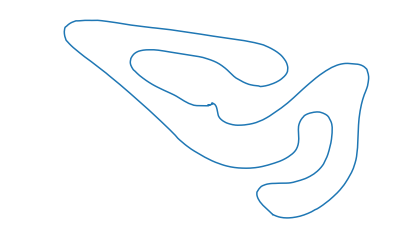

In [166]:
plt.plot(longitudele[3620:5520],latitudele[3620:5520])
plt.axis('off')
plt.show()

In [167]:
tiempovueltaele = tiempoele[3620:5520]-tiempoele[3620]

In [168]:
tiempototalele = tiempovueltaele[-1]
tiempototalele

282.30000000000291

In [169]:
carpeta2 = 'Data'
file2 = 'VBOX0020.VBO'

In [21]:
kartgaso = load(carpeta2,file2)
tiempogas = kartgaso[0]
latitudgas = kartgaso[1]
longitudgas = kartgaso[2]
velocidadgas = kartgaso[3]
alturagas = kartgaso[4]
velocidadvertgas =  kartgaso[5]
tiempobasegas = kartgaso[6]
deltagas = kartgaso[7]

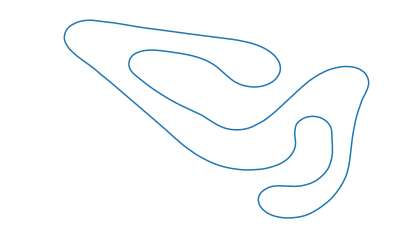

In [100]:
plt.plot(longitudgas[3000:8432],latitudgas[3000:8432])
plt.axis('off')
plt.show()

In [109]:
tiempovueltagas = tiempogas[3000:8432]-tiempogas[3000]
tiempototalgas = tiempovueltagas[-1]
tiempototalgas

54.310000000004948